In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
# Get the absolute path to the project root
notebook_dir = os.path.dirname(os.path.abspath(''))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
sys.path.append(project_root)  # Add the project root to the path

In [6]:
# Load the data using absolute path
data_file = r"C:/Users/Bekam/Desktop/acadamy 10/Predicting-Price-Moves-with-News-Sentiment/src/data/raw_analyst_ratings.csv"
news_data = pd.read_csv(data_file)
print(f"Successfully loaded data: {news_data.shape}")

Successfully loaded data: (1407328, 6)


In [11]:
# Define the data file path using absolute path
print(f"Looking for data file at: {data_file}")

Looking for data file at: c:\Users\Bekam\Desktop\acadamy 10\Predicting-Price-Moves-with-News-Sentiment\src\data\raw_analyst_ratings.csv


In [12]:
# Basic plot setup
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Try to load data
try:
    # Load raw data
    news_data = pd.read_csv(data_file)
    print(f"Successfully loaded data: {news_data.shape}")
    
    # Display first few rows
    print("\nFirst few rows:")
    print(news_data.head())
    
    # Get column names
    print("\nColumns:")
    print(news_data.columns.tolist())
    
except Exception as e:
    print(f"Error loading data: {e}")

Successfully loaded data: (1407328, 6)

First few rows:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06

<Figure size 1000x600 with 0 Axes>


--- Headline Statistics ---
Average headline length: 73.12 characters
Median headline length: 64.00 characters
Minimum headline length: 3.00 characters
Maximum headline length: 512.00 characters

Average word count: 11.42 words
Median word count: 10.00 words

--- Headline Length Categories ---
length_category
Short         742360
Very Short    445340
Medium        146621
Long           38684
Very Long      34323
Name: count, dtype: int64


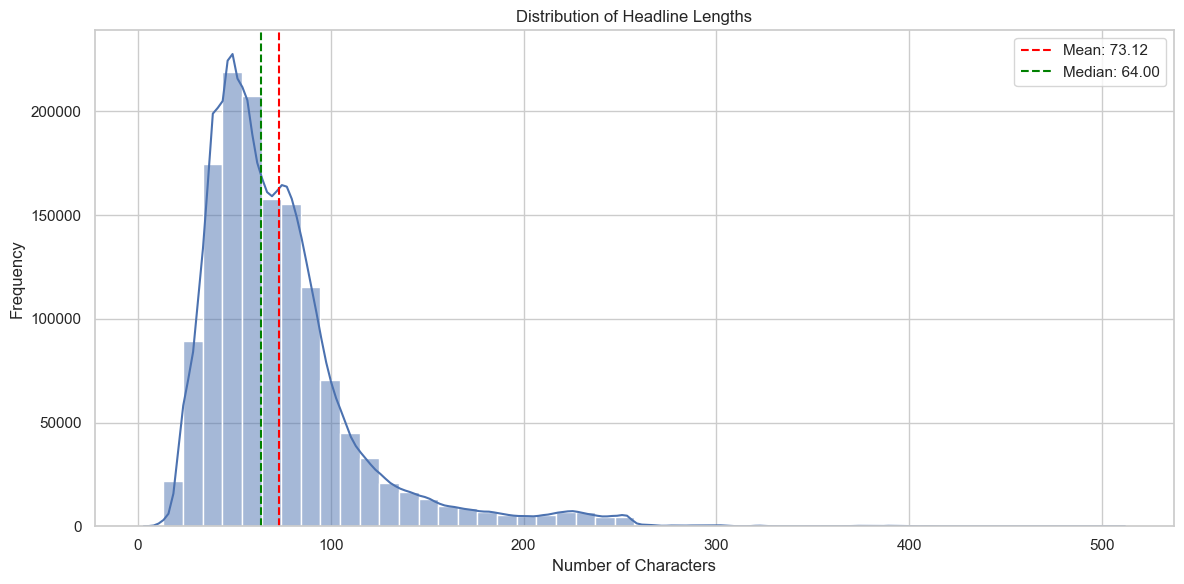

In [15]:
# Import our text statistics module
from src.features.text_stats import calculate_text_statistics, analyze_headline_complexity, get_length_categories

# Skip date processing for now and focus ONLY on headline analysis
if 'headline' in news_data.columns:
    # Add headline length columns
    news_data['headline_length'] = news_data['headline'].apply(len)
    news_data['word_count'] = news_data['headline'].apply(lambda x: len(str(x).split()))

    # Calculate basic statistics for headline lengths
    headline_stats = calculate_text_statistics(news_data)
    print("\n--- Headline Statistics ---")
    print(f"Average headline length: {headline_stats['char_length']['mean']:.2f} characters")
    print(f"Median headline length: {headline_stats['char_length']['50%']:.2f} characters")
    print(f"Minimum headline length: {headline_stats['char_length']['min']:.2f} characters")
    print(f"Maximum headline length: {headline_stats['char_length']['max']:.2f} characters")
    print(f"\nAverage word count: {headline_stats['word_count']['mean']:.2f} words")
    print(f"Median word count: {headline_stats['word_count']['50%']:.2f} words")

    # Categorize headlines by length
    news_data = get_length_categories(news_data)
    length_category_counts = news_data['length_category'].value_counts()
    print("\n--- Headline Length Categories ---")
    print(length_category_counts)

    # Visualize headline length distribution
    from src.visualization.plotting import plot_headline_length_distribution
    fig1 = plot_headline_length_distribution(news_data)
    plt.title('Distribution of Headline Lengths')
    plt.show()


--- Publisher Statistics ---
Number of unique publishers: 1034

Top 10 publishers by article count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

Top 10 publishers account for 66.53% of all articles


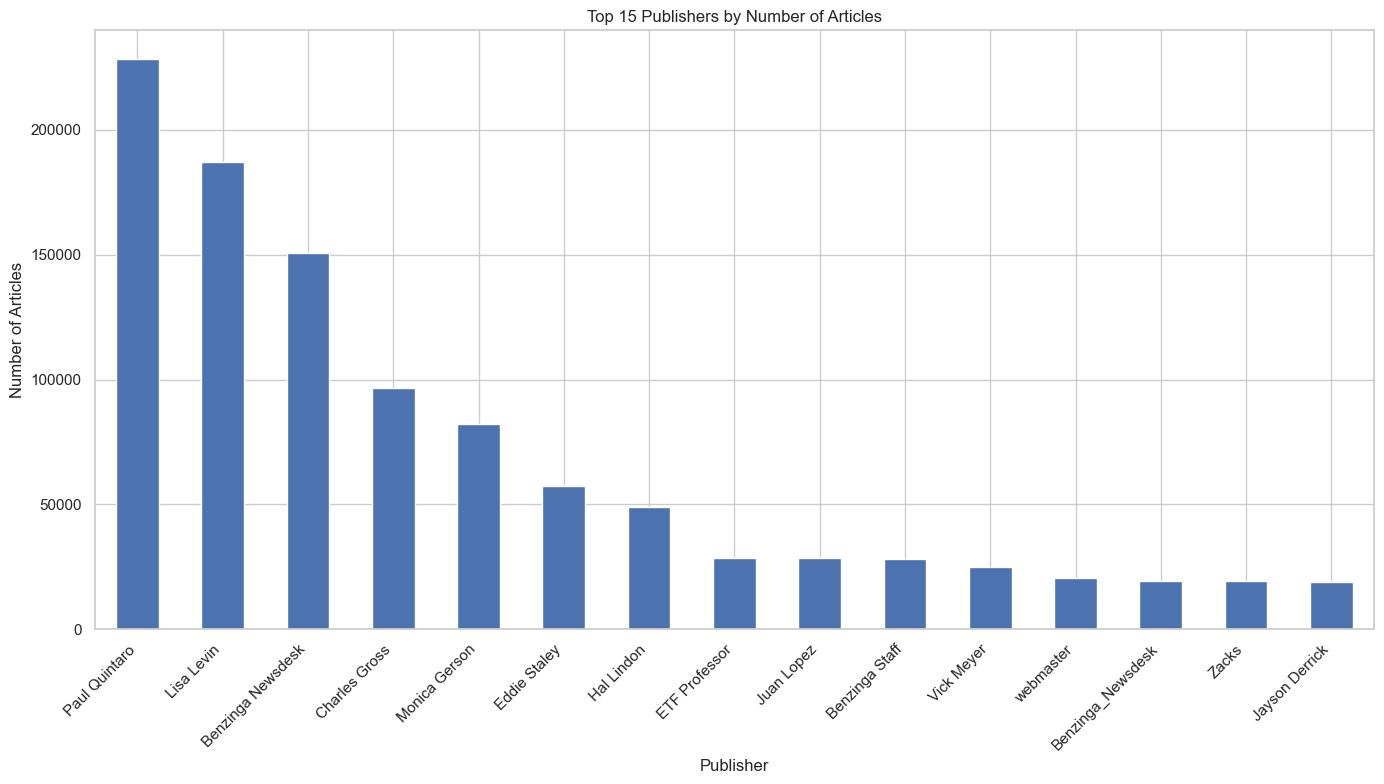

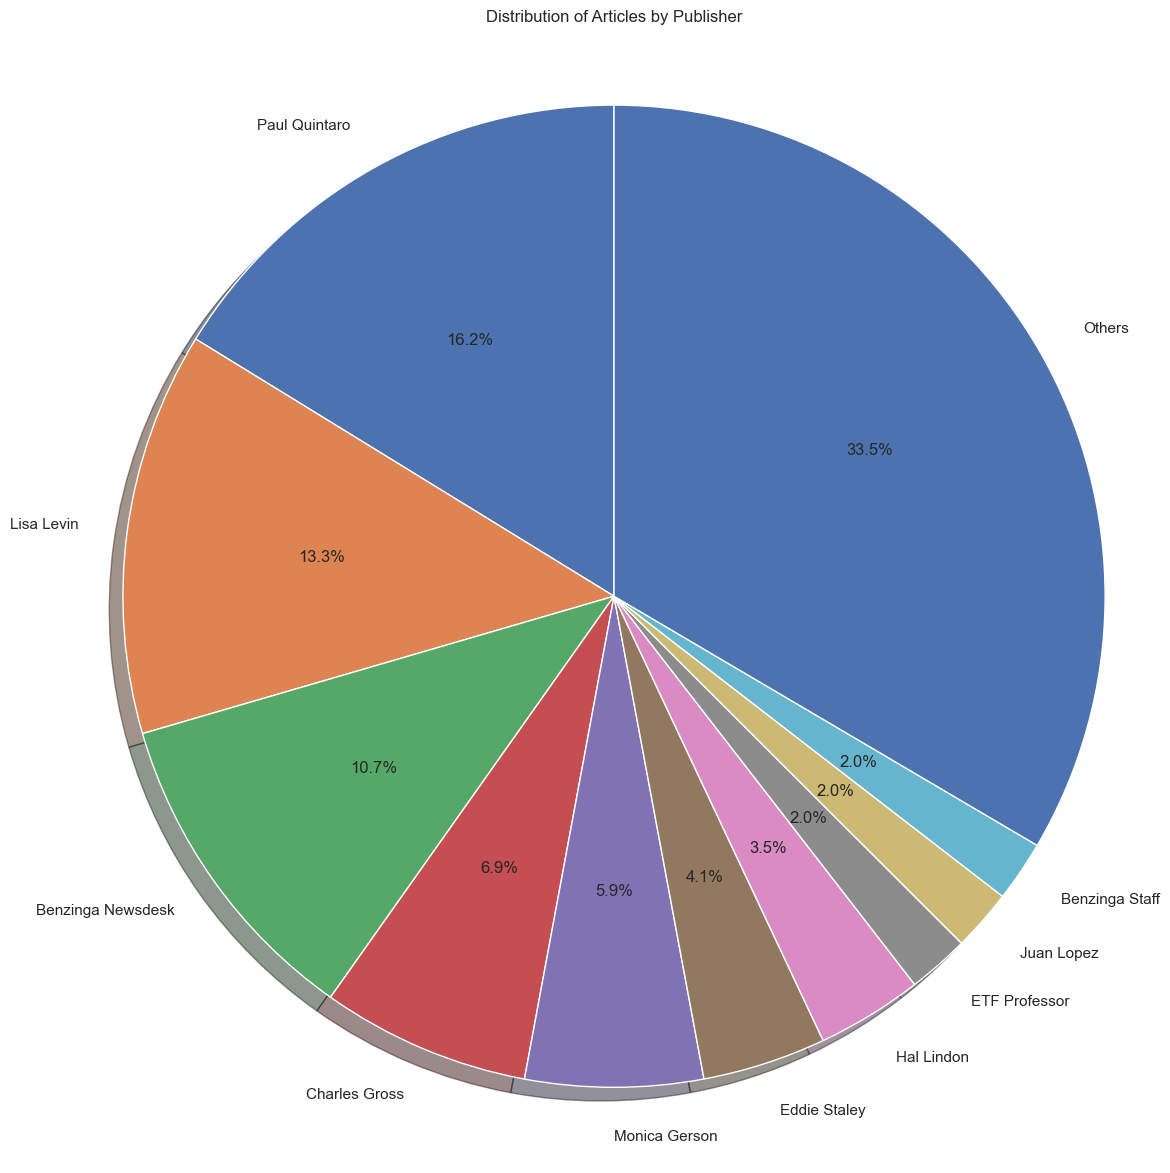

In [16]:
# Import our publisher analysis module
from src.features.publisher_analysis import get_publisher_counts, get_top_publishers

# Count articles per publisher
publisher_counts = get_publisher_counts(news_data)
print(f"\n--- Publisher Statistics ---")
print(f"Number of unique publishers: {len(publisher_counts)}")
print("\nTop 10 publishers by article count:")
top_publishers = get_top_publishers(news_data, n=10)
print(top_publishers)

# Calculate what percentage of articles the top 10 publishers account for
top_10_percentage = (top_publishers.sum() / publisher_counts.sum()) * 100
print(f"\nTop 10 publishers account for {top_10_percentage:.2f}% of all articles")

# Visualize top publishers
from src.visualization.plotting import plot_top_publishers, plot_publisher_pie
fig2 = plot_top_publishers(publisher_counts)
plt.title('Top 15 Publishers by Number of Articles')
plt.show()

# Create a pie chart of publisher distribution
fig3 = plot_publisher_pie(publisher_counts)
plt.title('Distribution of Articles by Publisher')
plt.show()

Original date column type: object
Sample values: ['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00', '2020-05-26 04:30:07-04:00']
Converting dates...
Date column type after conversion: datetime64[ns, UTC-04:00]
NaT values: 1351341
Rows with valid dates: 55987

--- Publication Day Analysis ---
Article counts by weekday:
date
Monday       10322
Tuesday      11002
Wednesday    11891
Thursday     12688
Friday        9381
Saturday       267
Sunday         436
Name: count, dtype: int64

--- Publication Hour Analysis ---
Article counts by hour of day:
date
0       67
1       14
2       57
3       93
4     1469
5     1829
6     2476
7     5033
8     5527
9     5965
10    7669
11    5701
12    5732
13    2710
14    2075
15    1612
16    3939
17    2800
18     704
19     227
20     131
21      82
22      48
23      27
Name: count, dtype: int64


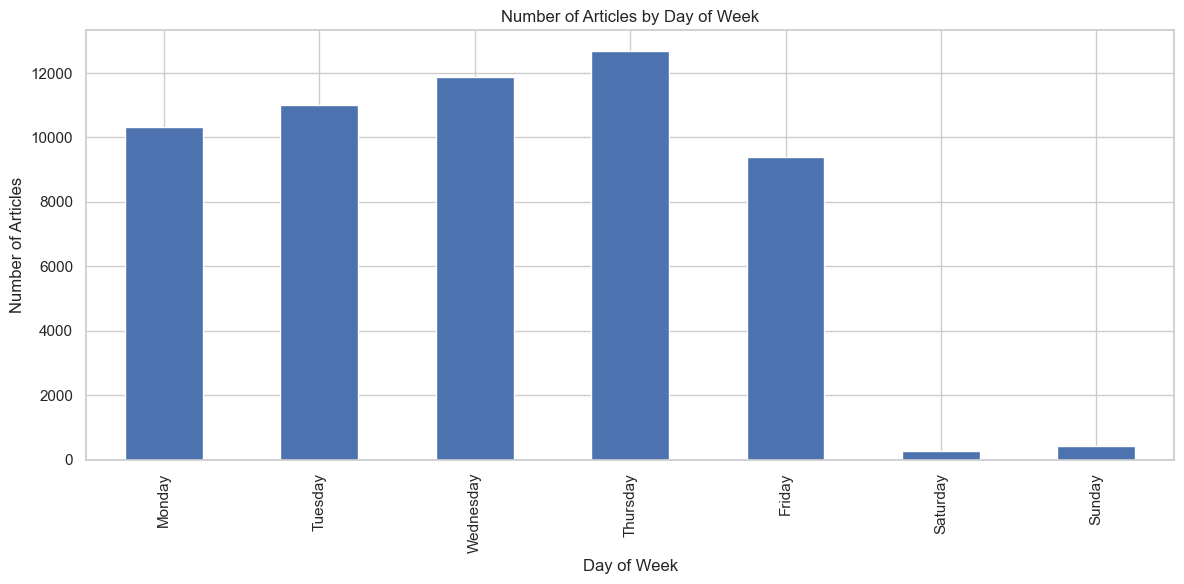

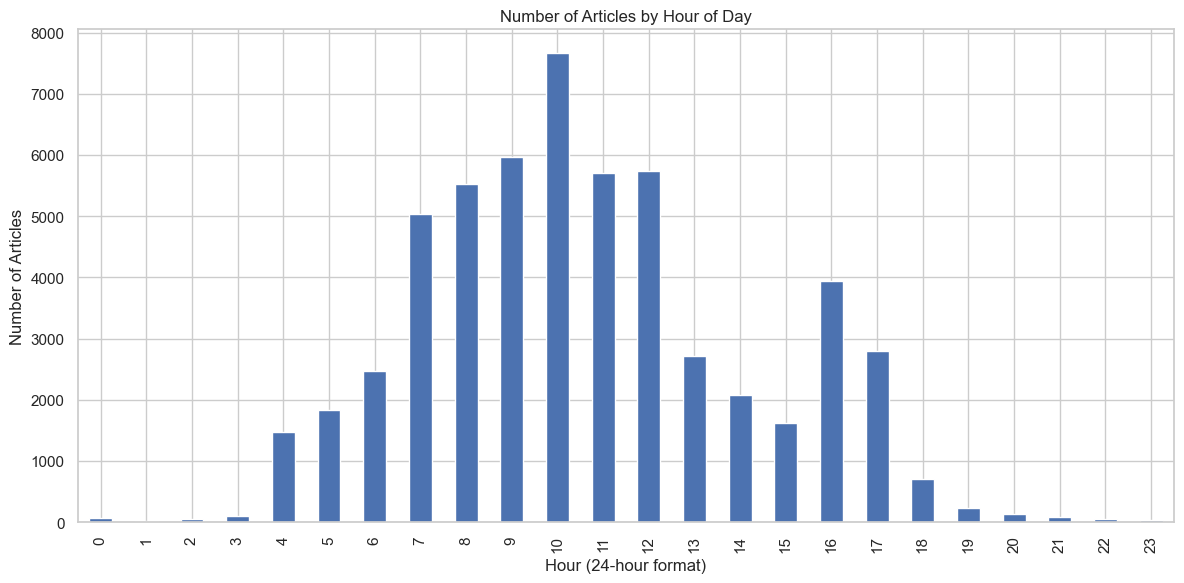

In [17]:

def robust_time_analysis(df, date_column='date'):
    """
    Perform time analysis with extra verification steps
    """
    # Check if column exists
    if date_column not in df.columns:
        print(f"Column '{date_column}' not found in DataFrame")
        return None
    
    # Make a copy to avoid modifying the original
    df_copy = df.copy()
    
    # First, check the original type
    print(f"Original date column type: {df_copy[date_column].dtype}")
    print(f"Sample values: {df_copy[date_column].head(3).tolist()}")
    
    try:
        # Try explicit conversion with a lenient format
        print("Converting dates...")
        df_copy[date_column] = pd.to_datetime(df_copy[date_column], 
                                             errors='coerce')
        
        # Verify conversion worked
        print(f"Date column type after conversion: {df_copy[date_column].dtype}")
        print(f"NaT values: {df_copy[date_column].isna().sum()}")
        
        # Check if we have any valid dates
        if df_copy[date_column].notna().sum() == 0:
            print("No valid dates after conversion!")
            return None
            
        # Filter out rows with NaT values
        df_valid = df_copy.dropna(subset=[date_column])
        print(f"Rows with valid dates: {len(df_valid)}")
        
        # Create simple weekday and hour distributions manually without using dt accessor
        # This is a safer approach when dt accessor might fail
        weekday_counts = {}
        hour_counts = {}
        
        # Function to extract weekday safely
        def get_weekday(dt):
            if pd.notna(dt):
                try:
                    return dt.day_name()
                except:
                    return None
            return None
            
        # Function to extract hour safely
        def get_hour(dt):
            if pd.notna(dt):
                try:
                    return dt.hour
                except:
                    return None
            return None
        
        # Apply extraction functions
        weekdays = df_valid[date_column].apply(get_weekday)
        hours = df_valid[date_column].apply(get_hour)
        
        # Count weekdays
        weekday_counts = weekdays.value_counts()
        hour_counts = hours.value_counts().sort_index()
        
        # Reindex weekday counts with proper order
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        weekday_counts = weekday_counts.reindex(weekday_order)
        
        # Print results
        print("\n--- Publication Day Analysis ---")
        print("Article counts by weekday:")
        print(weekday_counts)
        
        print("\n--- Publication Hour Analysis ---")
        print("Article counts by hour of day:")
        print(hour_counts)
        
        # Return distributions
        return {
            'weekday': weekday_counts,
            'hourly': hour_counts
        }
        
    except Exception as e:
        print(f"Error in time analysis: {e}")
        return None

# Run the robust analysis
time_distributions = robust_time_analysis(news_data)

# Visualize results if we have them
if time_distributions:
    # Create weekday plot
    if 'weekday' in time_distributions and not time_distributions['weekday'].empty:
        from src.visualization.plotting import plot_weekday_distribution
        fig4 = plot_weekday_distribution(time_distributions['weekday'])
        plt.title('Number of Articles by Day of Week')
        plt.show()
    
    # Create hourly plot
    if 'hourly' in time_distributions and not time_distributions['hourly'].empty:
        from src.visualization.plotting import plot_hourly_distribution
        fig5 = plot_hourly_distribution(time_distributions['hourly'])
        plt.title('Number of Articles by Hour of Day')
        plt.show()

In [19]:
# Create a summary dictionary with key insights - without busy_periods
summary = {
    'total_articles': len(news_data),
    'unique_publishers': len(publisher_counts),
    'avg_headline_length': headline_stats['char_length']['mean'],
    'avg_word_count': headline_stats['word_count']['mean'],
    'most_common_length_category': news_data['length_category'].value_counts().index[0],
    'top_publisher': publisher_counts.index[0],
    'busiest_weekday': time_distributions['weekday'].idxmax(),
    'busiest_hour': time_distributions['hourly'].idxmax()
    # Removed 'total_busy_days' since busy_periods is not defined
}

print("\n=== SUMMARY STATISTICS ===")
for key, value in summary.items():
    print(f"{key}: {value}")

import os

# Set your absolute data folder path
base_path = r"C:/Users/Bekam/Desktop/acadamy 10/Predicting-Price-Moves-with-News-Sentiment/src/data"

# Full file path to save
processed_file = os.path.join(base_path, 'processed', 'news_data_with_stats.csv')

# Create directory if needed
os.makedirs(os.path.dirname(processed_file), exist_ok=True)

# Save file
news_data.to_csv(processed_file, index=False)

print(f"\nProcessed data saved to: {processed_file}")



=== SUMMARY STATISTICS ===
total_articles: 1407328
unique_publishers: 1034
avg_headline_length: 73.12051490484095
avg_word_count: 11.416705984674504
most_common_length_category: Short
top_publisher: Paul Quintaro
busiest_weekday: Thursday
busiest_hour: 10

Processed data saved to: C:/Users/Bekam/Desktop/acadamy 10/Predicting-Price-Moves-with-News-Sentiment/src/data\processed\news_data_with_stats.csv
